In [1]:
!pip install riskfolio-lib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 8.9 MB/s eta 0:00:00


In [40]:
!pip install quantstats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import riskfolio as rp
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import quantstats as qs

In [4]:
%cd ./drive/MyDrive/Deep Learning/6123Proj

/content/drive/MyDrive/Deep Learning/6123Proj


In [5]:
with open('./TechDataWeekly.pkl', 'rb') as f:
    tech_data = pickle.load(f)
with open('./TechPrediction.pkl', 'rb') as f:
    pred = pickle.load(f)
with open('./weights.pkl', 'rb') as f:
    week_weight = pickle.load(f)

In [ ]:
def cal_weight(subset_ret_df, expected_ret):
  port = rp.Portfolio(returns=subset_ret_df)

  port.mu = expected_ret.values
  port.cov = subset_ret_df.cov()

  port.upperlng = 0.15
  port.lowerlng = 0.0
  port.budget = 1

  model = 'Classic'
  rm = 'MV'
  rf = 0.0006684
  hist = False

  w_min_risk = port.optimization(model=model, rm=rm, obj='MinRisk', rf=rf, hist=hist)

  w_min_risk = w_min_risk.round(4)
  return w_min_risk

In [ ]:
results_dict = {}

for key, pred_df in pred.items():

    ret_dataframes = []
    for stock in pred_df.columns:
        if stock in tech_data:

            stock_ret = tech_data[stock][['ret']].rename(columns={'ret': stock})
            ret_dataframes.append(stock_ret)

    combined_ret_df = pd.concat(ret_dataframes, axis=1)

    weight_dfs = []

    for idx, row in pred_df.iterrows():

        subset_ret_df = combined_ret_df[combined_ret_df.index <= idx]
        expected_ret = row.to_frame().T
        weight = cal_weight(subset_ret_df, expected_ret)
        weight = weight.T
        weight.index = [idx]
        weight_dfs.append(weight)

    results_dict[key] = pd.concat(weight_dfs)



In [ ]:
results_dict[pd.Timestamp('2024-06-30 00:00:00')]

,000002,000338,000708,000733,000786,000807,002049,002179,002241,002271,...,600570,600584,600741,600760,600795,600809,601100,601800,603019,603806
2024-06-30,0.0593,0.0105,0.0113,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0099,0.0,0.1162,0.0,0.0459,0.1335,0.0080,0.0948
2024-07-07,0.0596,0.0085,0.0116,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0098,0.0,0.1168,0.0,0.0463,0.1339,0.0079,0.0938
2024-07-14,0.0596,0.0084,0.0119,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0096,0.0,0.1171,0.0,0.0472,0.1343,0.0080,0.0926
2024-07-21,0.0595,0.0086,0.0119,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0096,0.0,0.1172,0.0,0.0468,0.1344,0.0078,0.0931
2024-07-28,0.0594,0.0093,0.0117,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0096,0.0,0.1171,0.0,0.0465,0.1346,0.0079,0.0944
2024-08-04,0.0594,0.0093,0.0117,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0096,0.0,0.1171,0.0,0.0465,0.1346,0.0079,0.0943
2024-08-11,0.0596,0.0091,0.0118,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0095,0.0,0.1170,0.0,0.0466,0.1346,0.0075,0.0948
2024-08-18,0.0592,0.0096,0.0115,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0092,0.0,0.1175,0.0,0.0468,0.1349,0.0078,0.0943
2024-08-25,0.0588,0.0106,0.0115,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0088,0.0,0.1173,0.0,0.0478,0.1352,0.0069,0.0933
2024-09-01,0.0582,0.0117,0.0118,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0081,0.0,0.1176,0.0,0.0462,0.1360,0.0073,0.0926


In [ ]:
output_path = './weights.pkl'

with open(output_path, 'wb') as f:
    pickle.dump(results_dict, f)

output_path

'./weights.pkl'

In [51]:
results_dict = week_weight
row_weighted_returns = []

for key, weight_df in results_dict.items():
    for idx, row in weight_df.iterrows():
        weighted_sum = 0
        total_weight = 0

        for stock, weight in row.items():
            if weight == 0:
                continue

            if stock in tech_data:
                stock_data = tech_data[stock]['ret'].shift(-1)

                if idx in stock_data.index:
                    ret = stock_data.loc[idx]
                    weighted_return = np.exp(ret) * weight

                    weighted_sum += weighted_return
                    total_weight += weight

        row_weighted_returns.append((idx, weighted_sum))

row_weighted_returns_df = pd.DataFrame(row_weighted_returns, columns=["Date", "Weighted Return"])
row_weighted_returns_df.set_index("Date", inplace=True)

print(row_weighted_returns_df)

            Weighted Return
Date                       
2020-04-05         0.996319
2020-04-12         1.054016
2020-04-19         1.012331
2020-04-26         1.056419
2020-05-03         1.001215
...                     ...
2024-09-01         0.953364
2024-09-08         0.975662
2024-09-15         1.014242
2024-09-22         1.190213
2024-09-29         1.111010

[230 rows x 1 columns]


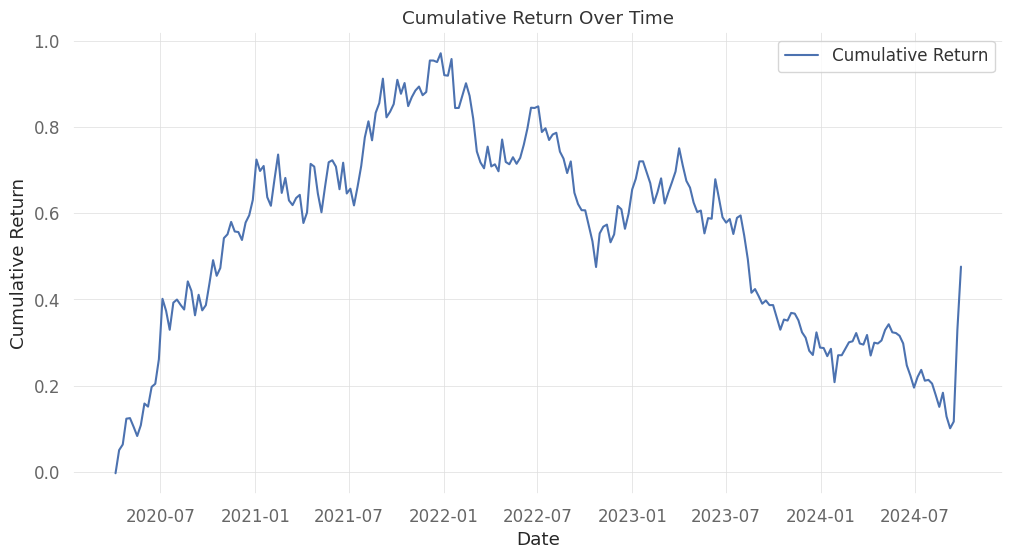

In [54]:
cumulative_returns = (row_weighted_returns_df["Weighted Return"]).cumprod() - 1

# 绘制累计回报图
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns, label="Cumulative Return")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Return Over Time")
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed


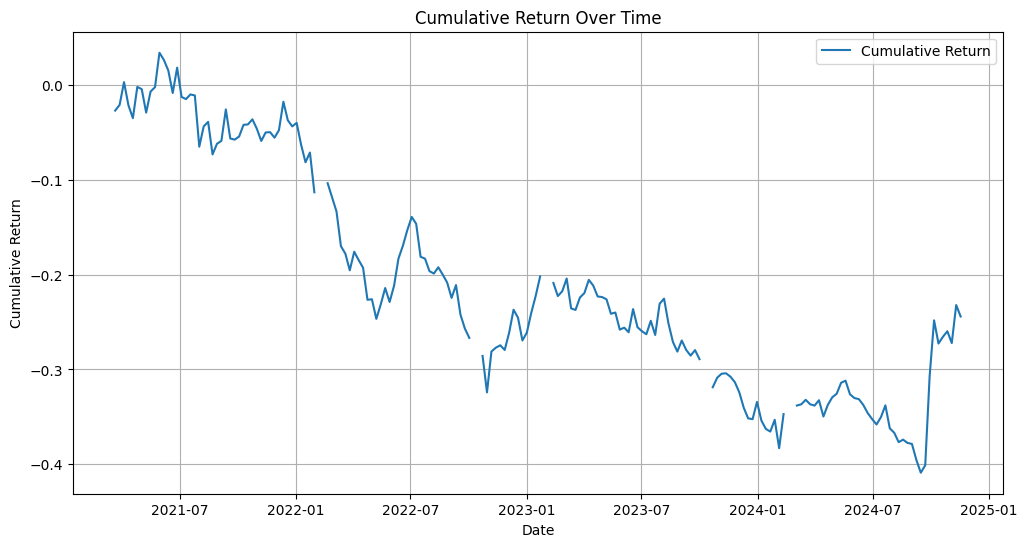

In [31]:
import yfinance as yf

index_code = "000300.SS"
start_date = "2020-01-01"
end_date = "2024-11-15"

data = yf.download(index_code, start=start_date, end=end_date)

weekly_data = data['Close'].resample('W').last()

weekly_data["ret"] = weekly_data['000300.SS'] / weekly_data['000300.SS'].shift(1)

# weekly_data["cumulative_return"] = np.cumprod(weekly_data['ret'].fillna(1)) - 1

index_cumulative_returns = np.cumprod(weekly_data["ret"]) - 1

plt.figure(figsize=(12, 6))
plt.plot(index_cumulative_returns, label="Cumulative Return")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title('Cumulative Return Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
index_returns = np.array(weekly_data["ret"])
portfolio_returns = np.array(row_weighted_returns)

index_returns_series = pd.Series(index_returns)

index_returns_series = index_returns_series.interpolate(method='linear', limit_direction='both')

index_returns_cleaned = index_returns_series.to_numpy()

def calculate_metrics(returns):
    cumulative_return = np.prod(returns) - 1

    annualized_return = (1 + cumulative_return) ** (1 / (len(returns) / 52)) - 1

    volatility = np.std(returns) * np.sqrt(52)

    sharpe_ratio = annualized_return / volatility

    cumulative_pnl = np.cumprod(returns)
    drawdown = cumulative_pnl / np.maximum.accumulate(cumulative_pnl) - 1
    max_drawdown = np.min(drawdown)

    return cumulative_return, annualized_return, volatility, sharpe_ratio, max_drawdown

index_metrics = calculate_metrics(index_returns_cleaned)
portfolio_metrics = calculate_metrics(portfolio_returns)

performance_table = pd.DataFrame(
    {
        "Metric": ["Cumulative Return", "Annualized Return", "Volatility", "Sharpe Ratio", "Max Drawdown"],
        "Portfolio": portfolio_metrics,
        "CSI300": index_metrics,
    }
)

print(performance_table)

performance_table.to_csv("performance_metrics_comparison.csv", index=False, encoding="utf-8-sig")

              Metric  Portfolio    CSI300
0  Cumulative Return   0.476301 -0.294542
1  Annualized Return   0.092064 -0.089723
2         Volatility   0.217361  0.180352
3       Sharpe Ratio   0.423556 -0.497488
4       Max Drawdown  -0.441817 -0.466635


In [ ]:
np.std(row_weighted_returns)

0.030142539830814306

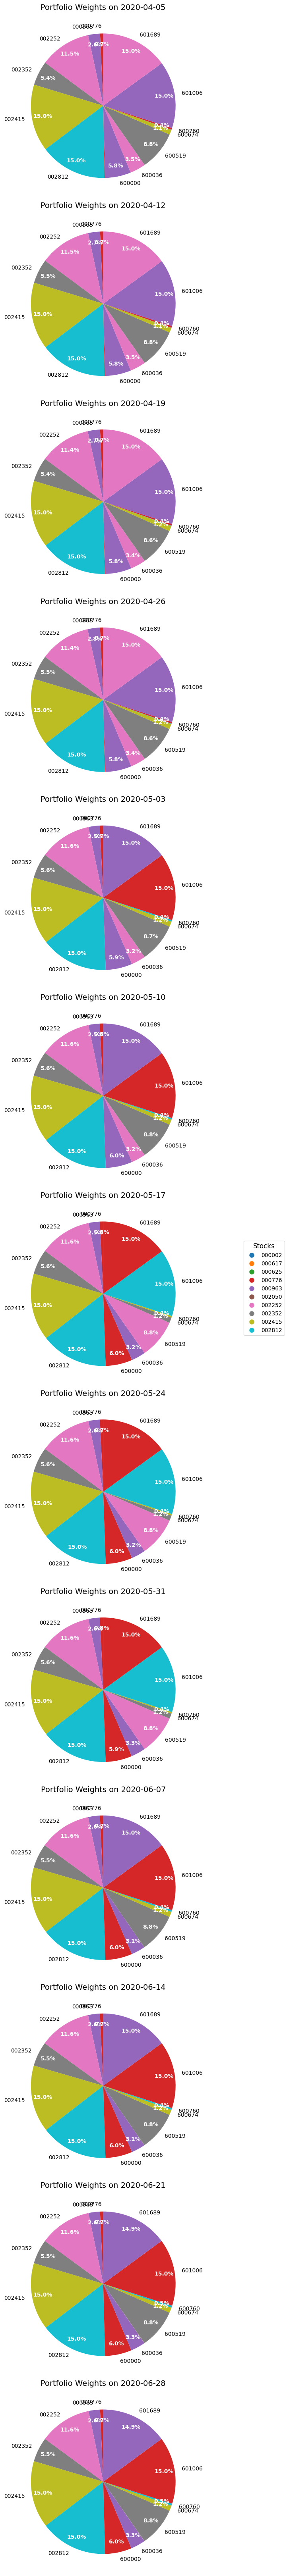

In [38]:
date = pd.Timestamp('2020-03-31 00:00:00')
all_stocks = week_weight[date].columns
color_map = {stock: color for stock, color in zip(all_stocks, mcolors.TABLEAU_COLORS)}

fig, axes = plt.subplots(nrows=len(week_weight[date]), ncols=1, figsize=(8, len(week_weight[date]) * 5))

if len(week_weight[date]) == 1:
    axes = [axes]

for i, (idx, row) in enumerate(week_weight[date].iterrows()):

    row_non_zero = row[row > 0]

    colors = [color_map[stock] for stock in row_non_zero.index if stock in color_map]

    def custom_autopct(pct):
        return ('%1.1f%%' % pct) if pct > 0.25 else ''

    wedges, texts, autotexts = axes[i].pie(
        row_non_zero, labels=[label if weight > 0.0025 else '' for label, weight in row_non_zero.items()],
        colors=colors, autopct=custom_autopct, startangle=90, pctdistance=0.85
    )

    for text in autotexts:
        text.set_fontsize(10)
        text.set_color("white")
        text.set_weight("bold")

    axes[i].set_title(f"Portfolio Weights on {idx.date()}", fontsize=14, pad=10)

fig.legend(
    handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[stock], markersize=10)
             for stock in all_stocks if stock in color_map],
    labels=list(all_stocks), loc='center right', title="Stocks", fontsize=10, title_fontsize='12'
)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()